# COMP41680 Assignment 1: Data Collection & Preparation


## Student Name       :   Karthick Mohanasundaram
## Student No.           :   15200702
## Degree                   :   MSc Computer Science (NL)

The objective of this assignment is to collect a dataset from one or more open web
APIs of your choice, and use Python to pre-process and analyse the collected data. 

In [36]:
import os
import pandas as pd
import json
import simplejson
import json
import urllib.request
import datetime
import time as t
import glob
from time import gmtime, strftime
from pprint import pprint
from os.path import expanduser

home = expanduser("~") #Gets the home directory of the user (works on mac)
dublinFolder = home+"/Desktop/dublin/"
belfastFolder = home+"/Desktop/belfast/"
os.makedirs(dublinFolder) #Creates folder with name 'dublin' in the home directory of user's Desktop (works on mac)
os.makedirs(belfastFolder) #Creates folder with name 'belfast' in the home directory of user's Desktop (works on mac)

In [37]:
counter = 0 #Counter to track the total number of execution.
def executeForEachOneHour():
    global counter
    counter += 1 #Will increment the counter by 1 
    
    
    
    
    
                                            #Task - 1
#         Choose one or more open web APIs as your source of data. If you decide to use
#                   more than one API, the APIs should be related in some way.
    
    #CityBikes API
    #This API returns the real time citybikes data for every country in Europe which are owned by various companies.
    #http://api.citybik.es/v2/networks
    
    
    
    #Returns the real time data for city bikes in Dublin and Belfast City
    dublinUrl = "http://api.citybik.es/v2/networks/dublinbikes"
    belfastUrl = "http://api.citybik.es/v2/networks/belfastbikes-belfast"
    
    
    
    
                                            #Task - 2 
#         Collect data from your chosen API(s) using Python. Your dataset should contain at
#                         least 100 records/items in total
    
    
    #Collecting the data
    response = urllib.request.urlopen(dublinUrl)
    raw_json = response.read().decode()
    
    #parsing the JSON data
    data = json.loads(raw_json)
    json_str = json.dumps(data)
    jsondata = simplejson.dumps(data, indent=4, skipkeys=True, sort_keys=True)

    #append the current system time at the end each file created every one hour starting at 10AM to 7 PM. 
    #Storing the data in json
    time = strftime("%Y-%m-%d-%H:%M:%S", gmtime())
    Dublinfilename = "DublinBikes"+time+".json"

    
    
    
                                            #Task - 3
    
    #for this assignment data for city bikes in Dublin city was taken from 10 am to 7 pm on 22/3/2017
    fd = open(dublinFolder+"/"+Dublinfilename, 'w')
    fd.write(jsondata)
    fd.close()
    
    
    
    #     ----------------------------------- Querying Belfast API-----------------------------------------# 
                                                #Belfast bikes
    
    
    
    
    #Collecting the data
    response = urllib.request.urlopen(belfastUrl)
    raw_json = response.read().decode()
    
    #parsing the JSON data
    data = json.loads(raw_json)
    json_str = json.dumps(data)
    jsondata = simplejson.dumps(data, indent=4, skipkeys=True, sort_keys=True)
    
    #append the current system time at the end each file created every one hour starting at 10AM to 7 PM. 
    #Storing the data in json
    Belfastfilename = "BelfastBikes"+time+".json"
    
    #for this assignment data for city bikes in Belfast city was taken from 10 am to 7 pm on 22/3/2017
    fd = open(belfastFolder+"/"+Belfastfilename, 'w')
    fd.write(jsondata)
    fd.close()
    
    #function will again be executed after 1 hour(3600 sec)
    t.sleep(3600)

while (counter <= 10):
    executeForEachOneHour()

In [55]:
dublinBikesList = [];
belfastBikesList = [];

dublinFiles = (glob.glob(dublinFolder+"*.json")) #List of path all the files in the dublin directory
belfastFiles = (glob.glob(belfastFolder+"*.json")) #List of path all the files in the belfast directory

for f in dublinFiles:
    fd = open(str(f), "r") #Convert the path into a string to avoid unicode decode error
    text = fd.read()
    fd.close()
    dublinbike = json.loads(text)
    dublinBikesList.append(dublinbike)
    
for f in belfastFiles:
    fd = open(str(f), "r") #Convert the path into a string to avoid unicode decode error
    text = fd.read()
    fd.close()
    belfastbike = json.loads(text)
    belfastBikesList.append(belfastbike)

In [56]:
dublinDataFrame = [];
belfastDataFrame = [];

                                            #Task - 4
    
#filtering the required data and creating the dataframe
for l in dublinBikesList:
    
    
    #appending the dataframes to the "dublinDataFrame"
    #this dataframe is used to retrieve data for specific street in dublin
    dublinDataFrame.append(pd.DataFrame(l['network']['stations'], 
                                        columns = ['empty_slots','free_bikes','name','timestamp']))
    
for l in belfastBikesList:
    
    #appending the dataframes to the "dublinDataFrame"
    belfastDataFrame.append(pd.DataFrame(l['network']['stations'], 
                                        columns = ['empty_slots','free_bikes','name','timestamp']))


## ----------------- Filtering and Processing the data from the "dublinDataFrame" -----------------

In [57]:
DublinList = list();

for df in dublinDataFrame:
    
    #filtering the row whose column "name" equals to "PRINCES STREET / O'CONNELL STREET"
    ndf = (df[(df['name'] == "PRINCES STREET / O'CONNELL STREET")]).copy(deep=True)
    
    #converting object type of "timestamp" to "datatime64[ns]"
    ndf['timestamp'] = ndf['timestamp'].astype('datetime64[ns]')
    
    #seperates time from timestamp and stores under the cloumn "time"
    #new column "time" appendes ndf
    ndf['time'] = ndf['timestamp'].dt.time
    
    #retrieve values of time, empty_slots and free_bikes from ndf and appends to "dataf"
    DublinList.append(ndf[['time','empty_slots','free_bikes']])

    

#stores only the first data contained in "DublinList" 
dub = DublinList[0].copy(deep=True)




for f in range(1,len(DublinList)):
    
    #appending the rest of the data contained in "DublinList" to DataFrame "dub"
    dub = (dub.append(DublinList[f],ignore_index=True)).copy(deep=True)

    
    

#convert object type to string
dub['time'] = dub['time'].astype(str)

#convert string type to datetime
dub['time'] = pd.to_datetime(dub['time'])

#retrieve the time from dateandtime type "time"
dub['time'] = dub['time'].dt.time

#set time as index
dub.set_index(['time'],inplace=True)

## ---------------- Filtering and Processing the data from the "belfastDataFrame" ----------------

In [58]:
BelfastList = list();

for df in belfastDataFrame:
    
    #filtering the row whose column "name" equals to "Titanic Belfast Met"
    ndf = (df[(df['name'] == "Titanic Belfast Met")]).copy(deep=True)
    
    #converting object type of "timestamp" to "datatime64[ns]"
    ndf['timestamp'] = ndf['timestamp'].astype('datetime64[ns]')
    
    #seperates time from timestamp and stores under the cloumn "time"
    #new column "time" appendes ndf
    ndf['time'] = ndf['timestamp'].dt.time
    BelfastList.append(ndf[['time','empty_slots','free_bikes']])

    
#stores only the first data contained in "BelfastList" 
bfs = BelfastList[0].copy(deep=True)


for f in range(1,len(BelfastList)):
    #appending the rest of the data contained in "BelfastList" to DataFrame "dub"
    bfs = (bfs.append(BelfastList[f],ignore_index=True)).copy(deep=True)

     

#convert object type to string
bfs['time'] = bfs['time'].astype(str)

#convert string type to datetime
bfs['time'] = pd.to_datetime(bfs['time'])

#retrieve the time from dateandtime type "time"
bfs['time'] = bfs['time'].dt.time

#set time as index
bfs.set_index(['time'],inplace=True)

##        -------------------------- Final Pre - Processing the 'dub"  DataFrame ------------------------

In [59]:
#look for missing data
dub.isnull().sum() # no missing values in the reduced dataset 

empty_slots    0
free_bikes     0
dtype: int64

In [60]:
dub.dtypes.value_counts() 

int64    2
dtype: int64

In [61]:
dub[0:len(dub)]

,empty_slots,free_bikes
time,,
09:59:16.357000,8,14
11:47:54.574000,0,22
13:06:21.073000,1,22
14:06:42.057000,1,22
15:07:02.339000,6,17
16:10:24.021000,2,21
17:10:50.424000,0,23
18:20:10.726000,2,21
19:17:34.375000,0,23


In [62]:
print("Descriptive Stats:\n")
print(dub.describe())

Descriptive Stats:

       empty_slots  free_bikes
count     9.000000    9.000000
mean      2.222222   20.555556
std       2.862594    3.045944
min       0.000000   14.000000
25%       0.000000   21.000000
50%       1.000000   22.000000
75%       2.000000   22.000000
max       8.000000   23.000000


## ------------------------------ Final Pre - Processing the 'bfs"  DataFrame -------------------------

In [63]:
#look for missing data
bfs.isnull().sum() # no missing values in the reduced dataset

empty_slots    0
free_bikes     0
dtype: int64

In [64]:
bfs.dtypes.value_counts() 

int64    2
dtype: int64

In [65]:
bfs[0:len(dub)]

,empty_slots,free_bikes
time,,
10:00:35.610000,7,7
11:49:13.916000,4,7
13:07:33.640000,4,7
14:08:06.585000,2,7
15:08:19.900000,5,7
16:08:46.203000,2,7
17:12:11.833000,10,8
18:18:31.215000,2,7
19:18:54.095000,1,6


In [66]:
print("Descriptive Stats:\n")
print(bfs.describe())

Descriptive Stats:

       empty_slots  free_bikes
count     9.000000         9.0
mean      4.111111         7.0
std       2.891559         0.5
min       1.000000         6.0
25%       2.000000         7.0
50%       4.000000         7.0
75%       5.000000         7.0
max      10.000000         8.0


# ------------------------------------- Task - 5 -------------------------------------------

## ------------------------------ Matplotlib and Pandas Graphing --------------------------------------

EMPTY SLOTES:- No. of slots which have no bikes to rent
FREE BIKES:- No. of available bikes to rent


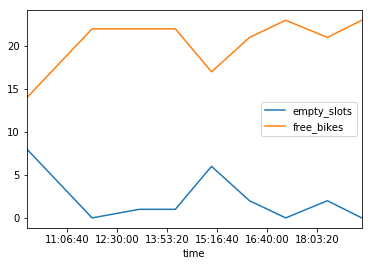

In [67]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
print("EMPTY SLOTES:- No. of slots which have no bikes to rent")
print("FREE BIKES:- No. of available bikes to rent")
dub.plot()

The above graph describes the no. of free bikes (indicated by RED) and empty slots (indicated by BLUE) available between 10 a.m and 7 p.m in "PRINCES STREET / O'CONNELL STREET, DUBLIN, at the bike shop - JCDecaux (company name)."

The graph indicates that from 10 a.m to 12 p.m there was a steady increase in returning of bikes but after 12 p.m until 2.30 p.m there was no renting or returning of bikes. From 2.30 p.m to 3 p.m, there was a sharp increase in the no. of rented bikes after which it reduced.

It is very evident from the graph that the empty slots are inversely propertional to the bikes available.

EMPTY SLOTES:- No. of slots which have no bikes to rent
FREE BIKES:- No. of available bikes to rent


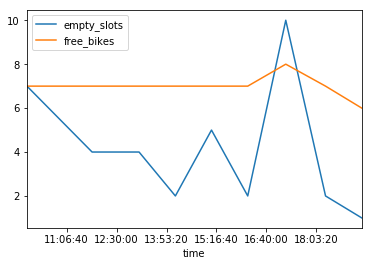

In [68]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
print("EMPTY SLOTES:- No. of slots which have no bikes to rent")
print("FREE BIKES:- No. of available bikes to rent")
bfs.plot()

The above graph describes the no. of free bikes (indicated by RED) and empty slots (indicated by BLUE) available between 10 a.m and 7 p.m in "Titanic Belfast Met, BELFAST, at the bike shop - Nextbike GmbH (company name)."

The graph indicates that from 10 a.m to 1.30 p.m there was a steady decrease in empty slots, indicating that people returned the rented bikes. From 3.30 p.m to 5 p.m, there was a steep spike indicating that the bikes had been rented by many people and almost everyone returned them by 6 p.m

EMPTY SLOTES:- No. of slots which have no bikes to rent
FREE BIKES:- No. of available bikes to rent


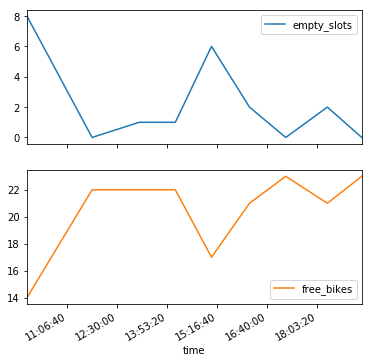

In [69]:
print("EMPTY SLOTES:- No. of slots which have no bikes to rent")
print("FREE BIKES:- No. of available bikes to rent")
dub.plot(subplots=True, figsize=(6, 6));

The Dual Graph shows that the empty slots and free bikes in "PRINCES STREET / O'CONNELL STREET, DUBLIN, from 10 a.m to 7 p.m are inversely propertional each other.

EMPTY SLOTES:- No. of slots which have no bikes to rent
FREE BIKES:- No. of available bikes to rent


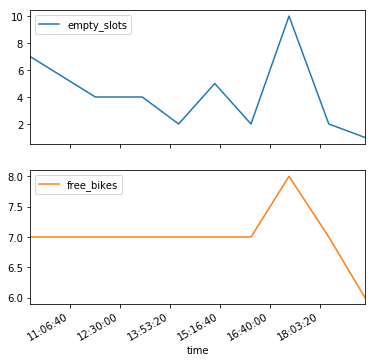

In [70]:
print("EMPTY SLOTES:- No. of slots which have no bikes to rent")
print("FREE BIKES:- No. of available bikes to rent")
bfs.plot(subplots=True, figsize=(6, 6));

The above dual graph indicates that the usage of bikes in TITANIC BELFAST MET is low as the no. of free bikes availability is constant at most of the time. 

### Comparison of no. of empty slots and free bikes between PRINCES STREET / O'CONNELL STREET and TITANIC BELFAST MET 

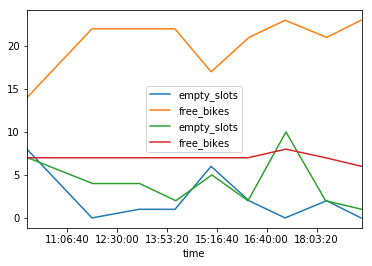

In [71]:
ax = dub.plot()
bfs.plot(ax=ax)

             ----------------------------------- Analysis ----------------------------------

In "Dublin", people frequently use bikes. Meanwhile, in "Belfast" the frequency of bike uasge is less because many people return bikes in evening

Deliverables:
    A single ZIP file containing code and all (or a sample of) data.